# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [ ]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


In [1]:
import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


n = 5
węzły = main.chebyshev_nodes(n)
wagi=main.bar_cheb_weights(n)

print(węzły)
print(wagi)


[-1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]
[ 0.5 -1.   1.  -1.   1.  -0.5]


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [ ]:
# ===== Twoja implementacja tutaj =====
import numpy as np
from typing import Union
import math

def f1(x: Union[int , float , np.ndarray]) -> Union[int,float , np.ndarray]:
    """Funkcja wyliczająca wartości funkcji f(x).
    f(x) = e^(-2x) + x^2 - 1

    Args:
        x (int | float | np.ndarray): Argumenty funkcji.

    Returns:
        (int | float | np.ndarray): Wartości funkcji f(x).

    Raises:
        TypeError: Jeśli argument x nie jest typu `np.ndarray`, `float` lub 
            `int`.
        ValueError: Jeśli argument x nie jest jednowymiarowy.
    """
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return np.exp(-2 * x) + x**2 - 1



---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


In [4]:
import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

print(main.L_inf(5,5))

None


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


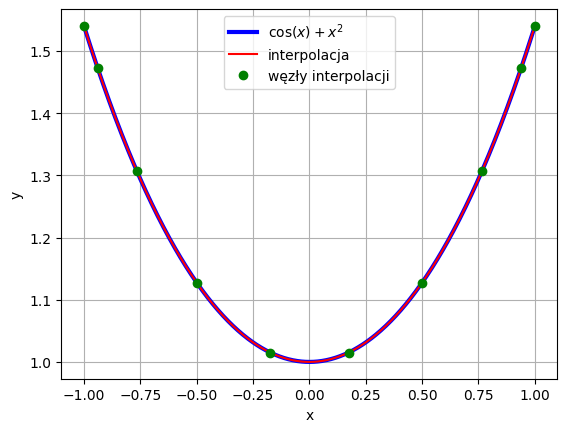

In [ ]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

Rząd: 10^1 (10 węzłów) | Czas: 0.000895 s | Błąd L_inf: 5.921962e-02


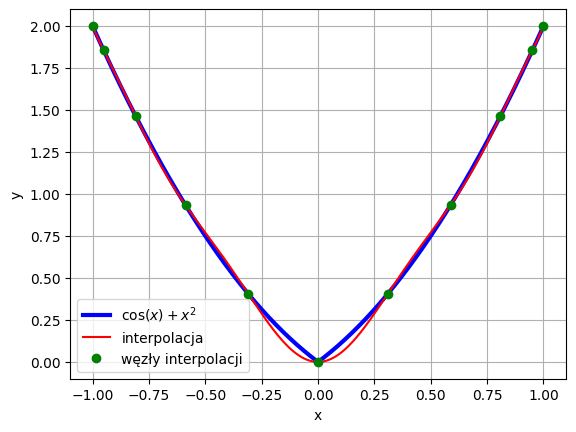

Rząd: 10^2 (100 węzłów) | Czas: 0.002986 s | Błąd L_inf: 5.965419e-03


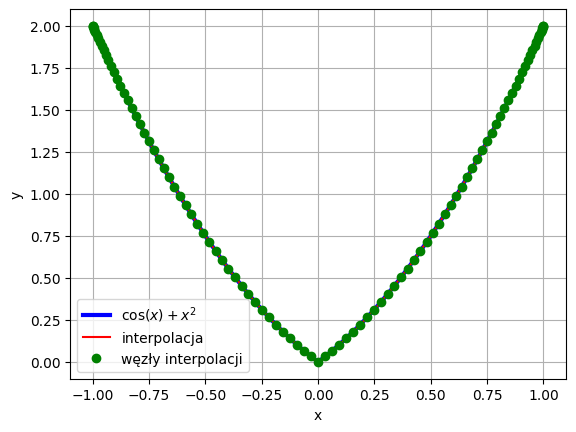

Rząd: 10^3 (1000 węzłów) | Czas: 0.032757 s | Błąd L_inf: 5.739643e-04


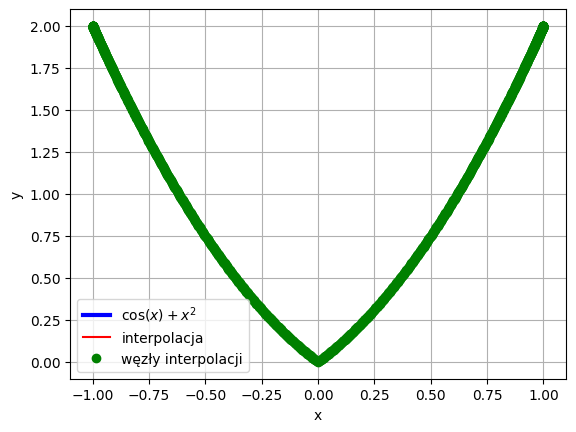

Rząd: 10^4 (10000 węzłów) | Czas: 0.615593 s | Błąd L_inf: 8.303505e-06


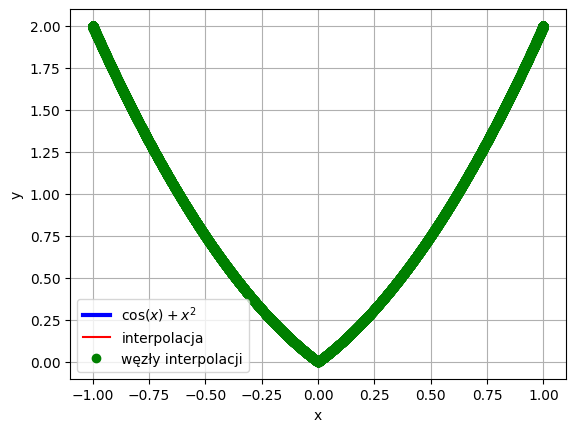

Rząd: 10^5 (100000 węzłów) | Czas: 73.204525 s | Błąd L_inf: 6.550513e-08


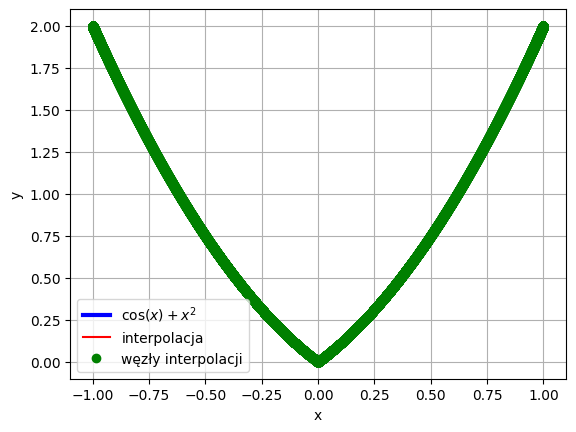

In [4]:
# ===== Twoja implementacja tutaj =====
import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time 
N =[1,2,3,4,5]  
x =np.linspace(-1, 1, 1000) 
y =main.f2(x)  



for n in N:
    
    w = 10**n 

    xch = main.chebyshev_nodes(w)

    start = time.perf_counter()
    yimp = sp.interpolate.barycentric_interpolate(xch, main.f2(xch), x)
    koniec = time.perf_counter()

    czas = koniec - start


    błąd = main.L_inf(y, yimp)


    print(f"Rząd: 10^{n} ({w} węzłów) | Czas: {czas:.6f} s | Błąd L_inf: {błąd:.6e}")

    plt.plot(x, main.f2(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
    plt.plot(x, yimp, 'r', label='interpolacja')
    plt.plot(xch, main.f2(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.show()


    # im większa ilosć węzłów tym mniejszy błąd normy wektorowej ale dluższy czas na wykonianie obliczeń

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

<>:48: SyntaxWarning: invalid escape sequence '\i'
<>:48: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Krzysztof Olszewski\AppData\Local\Temp\ipykernel_11188\2781103739.py:48: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel('Błąd ($L_\infty$)')


Funkcja f2(x) | Rząd 10^1 | Błąd: 5.9220e-02
Funkcja f2(x) | Rząd 10^2 | Błąd: 5.9654e-03
Funkcja f2(x) | Rząd 10^3 | Błąd: 5.7396e-04
Funkcja f2(x) | Rząd 10^4 | Błąd: 8.3035e-06
Funkcja f2(x) | Rząd 10^5 | Błąd: 6.5505e-08
Funkcja f3(x) | Rząd 10^1 | Błąd: 2.7710e-01
Funkcja f3(x) | Rząd 10^2 | Błąd: 1.4259e-04
Funkcja f3(x) | Rząd 10^3 | Błąd: 1.1873e-07
Funkcja f3(x) | Rząd 10^4 | Błąd: 4.5692e-11
Funkcja f3(x) | Rząd 10^5 | Błąd: 5.2180e-15


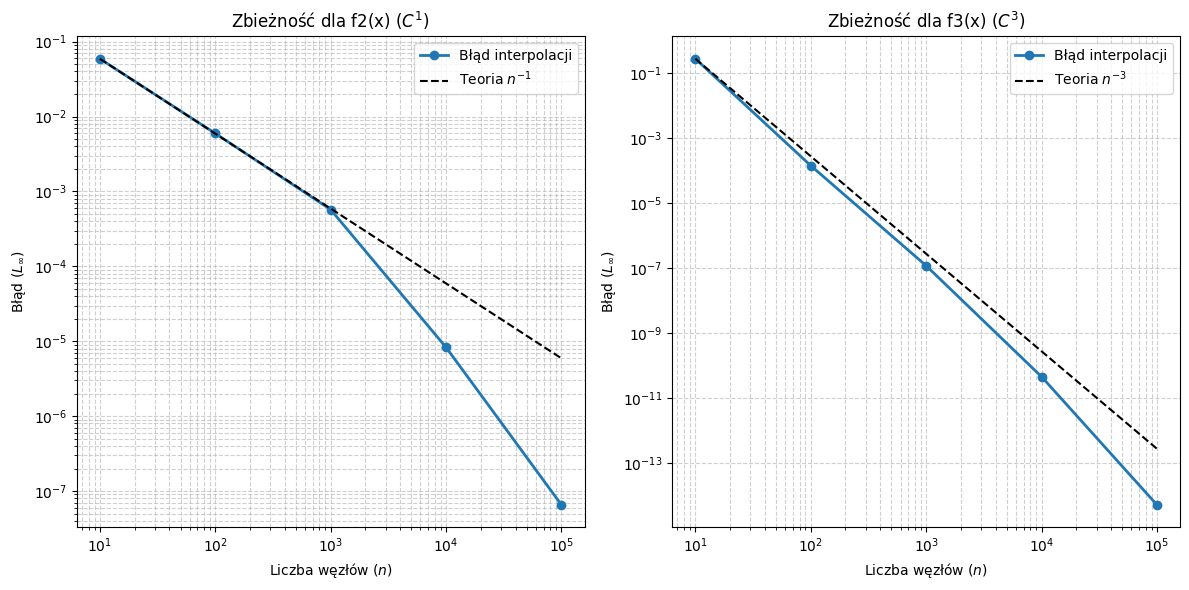

In [ ]:

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


N =[1,2,3,4,5]  
x =np.linspace(-1, 1, 1000) 


funkcje = [(main.f2, 1, "f2(x)"), (main.f3, 3, "f3(x)")]

plt.figure(figsize=(12, 6))

for i, (func,v,label) in enumerate(funkcje):

    normy_bledow = []
    liczby_wezlow = []
    
    for n in N:
        w = 10**n
        liczby_wezlow.append(w)
        

        xch = main.chebyshev_nodes(w)
        ych = func(xch)
        
        yimp = sp.interpolate.barycentric_interpolate(xch, ych, x)
        

        blad = main.L_inf(func(x), yimp)
        normy_bledow.append(blad)
        
        print(f"Funkcja {label} | Rząd 10^{n} | Błąd: {blad:.4e}")

    ax = plt.subplot(1, 2, i + 1)
    ax.loglog(liczby_wezlow, normy_bledow, 'o-', linewidth=2, label='Błąd interpolacji')
    
    ref_wezly = np.array(liczby_wezlow)
    ref_line = normy_bledow[0] * (ref_wezly / ref_wezly[0])**(-v)
    
    ax.loglog(ref_wezly, ref_line, 'k--', label=f'Teoria $n^{{-{v}}}$')
    
    ax.set_title(f'Zbieżność dla {label} ($C^{v}$)')
    ax.set_xlabel('Liczba węzłów ($n$)')
    ax.set_ylabel('Błąd ($L_\infty$)')
    ax.legend()
    ax.grid(True, which="both", linestyle="--", alpha=0.6)
    
plt.show()

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

<>:44: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
<>:44: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Krzysztof Olszewski\AppData\Local\Temp\ipykernel_17232\3652595093.py:44: SyntaxWarning: invalid escape sequence '\i'
  plt.title("Zależność błędu $L_\infty$ od rzędu $n$")
C:\Users\Krzysztof Olszewski\AppData\Local\Temp\ipykernel_17232\3652595093.py:46: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("Błąd $L_\infty$")



Wyniki stabilizacji błędu (norma L_inf):
Dla n parzystych błąd dąży do:   1.958425
Dla n nieparzystych błąd dąży do: 0.933143


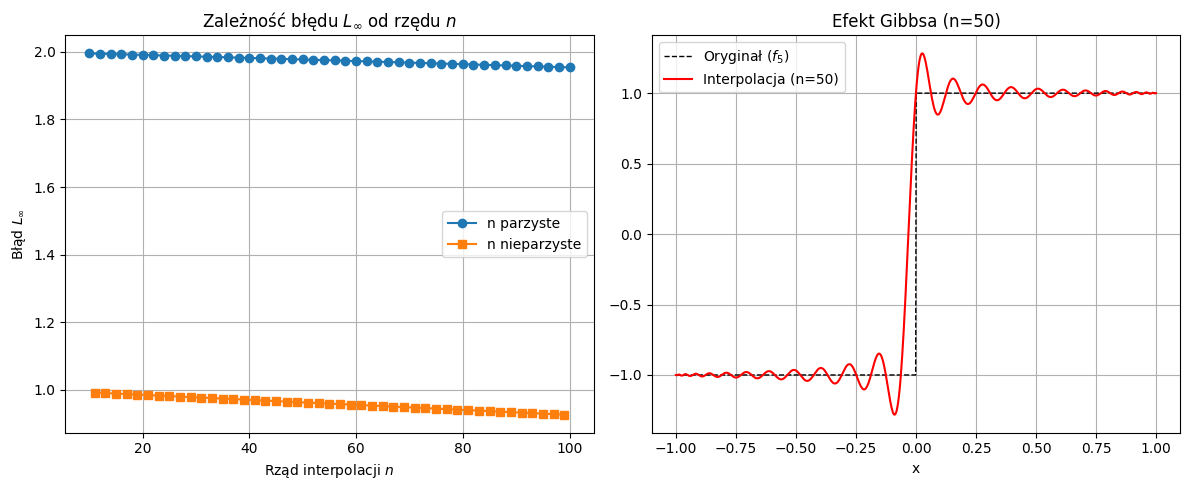

In [1]:
import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = range(10, 101) 

x =np.linspace(-1, 1, 1000) 
y =main.f5(x)  

bledy_parzyste=[]
bledy_nieparzyste=[]


for n in N:

    xch=main.chebyshev_nodes(n)
    
    yimp = sp.interpolate.barycentric_interpolate(xch, main.f5(xch), x)
    

    blad = main.L_inf(y, yimp)
    
    if n%2 == 0:
        bledy_parzyste.append(blad)
    else:
        bledy_nieparzyste.append(blad)


limit_parzyste = np.mean(bledy_parzyste[-10:])
limit_nieparzyste = np.mean(bledy_nieparzyste[-10:])

print(f"\nWyniki stabilizacji błędu (norma L_inf):")
print(f"Dla n parzystych błąd dąży do:   {limit_parzyste:.6f}")
print(f"Dla n nieparzystych błąd dąży do: {limit_nieparzyste:.6f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(N[::2], bledy_parzyste, 'o-', label='n parzyste')
plt.plot(N[1::2], bledy_nieparzyste, 's-', label='n nieparzyste')
plt.title("Zależność błędu $L_\infty$ od rzędu $n$")
plt.xlabel("Rząd interpolacji $n$")
plt.ylabel("Błąd $L_\infty$")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
n_demo = 50 
x_demo = main.chebyshev_nodes(n_demo)
y_demo_imp = sp.interpolate.barycentric_interpolate(x_demo, main.f5(x_demo), x)

plt.plot(x, y, 'k--', linewidth=1, label='Oryginał ($f_5$)')
plt.plot(x, y_demo_imp, 'r', label=f'Interpolacja (n={n_demo})')
plt.title(f"Efekt Gibbsa (n={n_demo})")
plt.xlabel("x")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)